In [11]:
import glob
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from Functions.class_Graph_TM import Graph_TM
from networkx.algorithms.cluster import *
from networkx.algorithms.bridges import *
from networkx.algorithms.distance_measures import *
from networkx.algorithms.shortest_paths.generic import *

In [12]:
files = sorted(glob.glob('Data/*.csv'))
G = Graph_TM()
G.insert_cbs(files)
#G.insert_cbs(files, notid=True)

In [13]:
G.Graph.number_of_nodes()

2027

Graph saved as ../TeX/Second set/img/all_comic_books_all_components.png


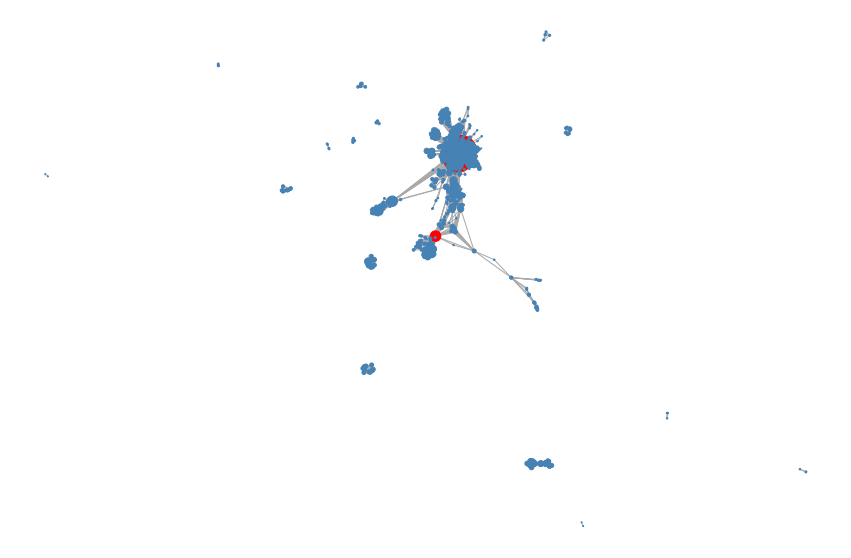

In [14]:
G.plot_network(max_node_size = 1000,
               max_connected_components = 'all',
               filename = 'all_comic_books_all_components')

Graph saved as ../TeX/Second set/img/all_comic_books_biggest_component.png


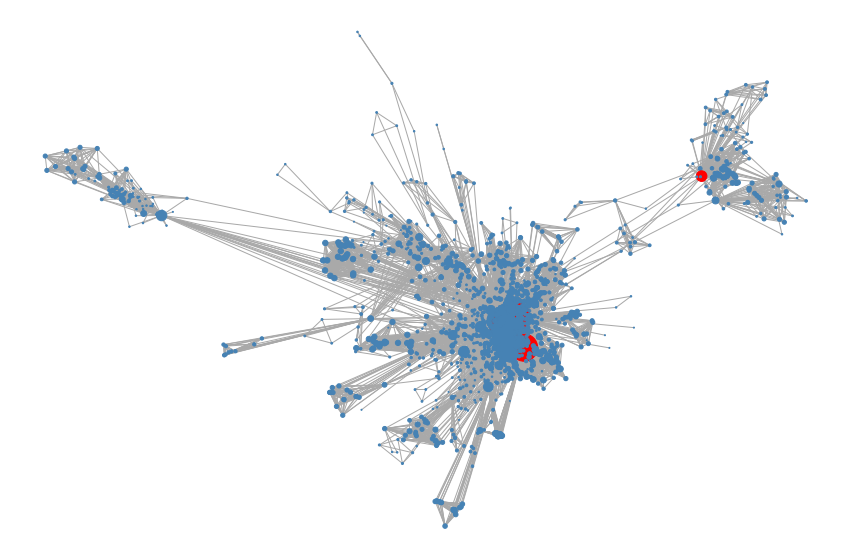

In [15]:
G.plot_network(max_node_size = 1000,
               filename = 'all_comic_books_biggest_component')

In [5]:
connected_components = list(nx.connected_components(G.Graph))
GN = G.Graph.number_of_nodes()
GL = G.Graph.number_of_edges()
G_degrees = np.array(G.Graph.degree)[:,1].astype(int)
G_density = 2 * GL / (GN * (GN - 1))
G_std_degree = G_degrees.std()
G_max_degree = G_degrees.max()
G_hbridges = has_bridges(G.Graph)
if G_hbridges:
    G_bridges = list(bridges(G.Graph))
    
print(nx.info(G.Graph))
print(f'Density: {G_density:.4f}')
print(f'Maximum degree: {G_max_degree}')
print(f'Degree Standard Deviation: {G_std_degree:.4f}')
print(f'Connected components: {len(connected_components)}')
if G_hbridges:
    print(f'Number of bridges: {len(G_bridges)}')
    print('Bridges:')
    for i in range(len(G_bridges)):
        print(f'{i + 1:2d} - {G_bridges[i]}')

Name: 
Type: Graph
Number of nodes: 2021
Number of edges: 13826
Average degree:  13.6823
Density: 0.0068
Maximum degree: 890
Degree Standard Deviation: 36.1882
Connected components: 16
Number of bridges: 32
Bridges:
 1 - ('Mônica', 'Toneco')
 2 - ('Magali', 'Anjo da Guarda da Magali')
 3 - ('Cascão', '#1tmj_10 Figurante 42')
 4 - ('Maria Cebolinha', '#tdm13 Figurante 6')
 5 - ('Marina', '#tdm07 Animal 1')
 6 - ('Marina', '#tdm07 Animal 2')
 7 - ('Marina', '#tdm08 Animal 2')
 8 - ('Imperador Japonês Sec XVI', '#1tmj_03 Guarda 1')
 9 - ('Astronauta', 'Astronauta do Futuro')
10 - ('Astronauta', '#tdm15 Monstro 1')
11 - ('Penadinho', '#tdm01 Animal 5')
12 - ('Penadinho', '#tdm05 Figurante 2')
13 - ('Zé Vampir', '#tdm03 Figurante 10')
14 - ('Bidu', '#tdm13 Figurante 10')
15 - ('Piteco', '#tdm01 Dinossauro 1')
16 - ('Piteco', 'Gronk')
17 - ('Piteco', '#tdm_38 Dinossauro 1')
18 - ('Piteco', '#tdm_38 Dinossauro 2')
19 - ('Piteco', '#tdm_38 Sábio da Montanha')
20 - ('Piteco', '#tdm_38 Dinossaur

In [6]:
# working only with the greatest connected component
H = nx.subgraph(G.Graph, connected_components[0])
avg_distance = nx.average_shortest_path_length(H)
H_diameter = diameter(H)
H_degrees = np.array(H.degree)[:,1].astype(int)
HN = H.number_of_nodes()
HL = H.number_of_edges()
H_density = 2 * HL / (HN * (HN - 1))
H_std_degree = H_degrees.std()
H_max_degree = H_degrees.max()
H_hbridges = has_bridges(H)
if H_hbridges:
    H_bridges = list(bridges(H))

print(nx.info(H))
print(f'Density: {H_density:.4f}')
print(f'Maximum degree: {H_max_degree}')
print(f'Degree Standard Deviation: {H_std_degree:.4f}')
print(f'Diameter: {H_diameter}')
print(f'Average distance: {avg_distance:.4f}')
if H_hbridges:
    print(f'Number of bridges: {len(H_bridges)}')

print(f'ln(N)/ln(<k>): {np.log(HN) / np.log(2 * HL / HN):.4f}')
if H_hbridges:
    print('Bridges:')
    for i in range(len(H_bridges)):
        print(f'{i + 1:2d} - {H_bridges[i]}')

Name: 
Type: Graph
Number of nodes: 1896
Number of edges: 13122
Average degree:  13.8418
Density: 0.0073
Maximum degree: 890
Degree Standard Deviation: 37.3168
Diameter: 9
Average distance: 2.8868
Number of bridges: 30
ln(N)/ln(<k>): 2.8723
Bridges:
 1 - ('Mônica', 'Toneco')
 2 - ('Magali', 'Anjo da Guarda da Magali')
 3 - ('Cascão', '#1tmj_10 Figurante 42')
 4 - ('Maria Cebolinha', '#tdm13 Figurante 6')
 5 - ('Marina', '#tdm07 Animal 1')
 6 - ('Marina', '#tdm07 Animal 2')
 7 - ('Marina', '#tdm08 Animal 2')
 8 - ('Imperador Japonês Sec XVI', '#1tmj_03 Guarda 1')
 9 - ('Astronauta', 'Astronauta do Futuro')
10 - ('Astronauta', '#tdm15 Monstro 1')
11 - ('Penadinho', '#tdm01 Animal 5')
12 - ('Penadinho', '#tdm05 Figurante 2')
13 - ('Zé Vampir', '#tdm03 Figurante 10')
14 - ('Bidu', '#tdm13 Figurante 10')
15 - ('Piteco', '#tdm01 Dinossauro 1')
16 - ('Piteco', 'Gronk')
17 - ('Piteco', '#tdm_38 Dinossauro 1')
18 - ('Piteco', '#tdm_38 Dinossauro 2')
19 - ('Piteco', '#tdm_38 Sábio da Montanha')


In [7]:
nodes = list(H.nodes())
paths = dict(shortest_path(H))
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        u = nodes[i]
        v = nodes[j]
        if len(paths[u][v]) == (H_diameter + 1):
            arrow = ' -> '
            print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')
            print()

Path from #tdm01 Animal 7 to #tdm16 Indiazinha 1:
#tdm01 Animal 7 -> Lobi -> Zé Vampir -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm16 Indiazinha 1

Path from #tdm01 Animal 7 to #tdm16 Índio:
#tdm01 Animal 7 -> Lobi -> Zé Vampir -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm16 Índio

Path from #tdm01 Animal 7 to #tdm16 Índia:
#tdm01 Animal 7 -> Lobi -> Zé Vampir -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm16 Índia

Path from #tdm01 Animal 7 to #tdm16 Figurante 4:
#tdm01 Animal 7 -> Lobi -> Zé Vampir -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm16 Figurante 4

Path from #tdm01 Animal 7 to #tdm16 Indiazinha 2:
#tdm01 Animal 7 -> Lobi -> Zé Vampir -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm16 Indiazinha 2

Path from #tdm01 Animal 7 to #tdm16 Indiazinha 3:
#tdm01 Animal 7 -> Lobi -> Zé Vampir -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Ca

Path from #tdm07 Figurante 7 to #tdm16 Indiazinha 1:
#tdm07 Figurante 7 -> #tdm07 Figurante 9 -> Penadinho -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm16 Indiazinha 1

Path from #tdm07 Figurante 7 to #tdm16 Índio:
#tdm07 Figurante 7 -> #tdm07 Figurante 9 -> Penadinho -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm16 Índio

Path from #tdm07 Figurante 7 to #tdm16 Índia:
#tdm07 Figurante 7 -> #tdm07 Figurante 9 -> Penadinho -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm16 Índia

Path from #tdm07 Figurante 7 to #tdm16 Figurante 4:
#tdm07 Figurante 7 -> #tdm07 Figurante 9 -> Penadinho -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm16 Figurante 4

Path from #tdm07 Figurante 7 to #tdm16 Indiazinha 2:
#tdm07 Figurante 7 -> #tdm07 Figurante 9 -> Penadinho -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm16 Indiazinha 2

Path from #tdm07 Figurante 7 to #tdm16 I

#tdm16 Indiazinha 3 -> #tdm16 Figurante 3 -> Papa-Capim -> Onça -> Chico Bento -> Duende -> Cascão -> Magali -> Cecê-boy -> #tdm18 Figurante 2

Path from #tdm16 Indiazinha 3 to #tdm18 Figurante 3:
#tdm16 Indiazinha 3 -> #tdm16 Figurante 3 -> Papa-Capim -> Onça -> Chico Bento -> Duende -> Cascão -> Magali -> Cecê-boy -> #tdm18 Figurante 3

Path from #tdm16 Indiazinha 3 to #tdm18 Figurante 4:
#tdm16 Indiazinha 3 -> #tdm16 Figurante 3 -> Papa-Capim -> Onça -> Chico Bento -> Duende -> Cascão -> Magali -> Cecê-boy -> #tdm18 Figurante 4

Path from #tdm16 Indiazinha 3 to #tdm18 Figurante 5:
#tdm16 Indiazinha 3 -> #tdm16 Figurante 3 -> Papa-Capim -> Onça -> Chico Bento -> Duende -> Cascão -> Magali -> Cecê-boy -> #tdm18 Figurante 5

Path from #tdm16 Indiazinha 3 to #tdm18 Figurante 6:
#tdm16 Indiazinha 3 -> #tdm16 Figurante 3 -> Papa-Capim -> Onça -> Chico Bento -> Duende -> Cascão -> Magali -> Cecê-boy -> #tdm18 Figurante 6

Path from #tdm16 Indiazinha 3 to #tdm18 Figurante 7:
#tdm16 Indiazin

Graph saved as ../TeX/Second set/img/communities_all_components.png


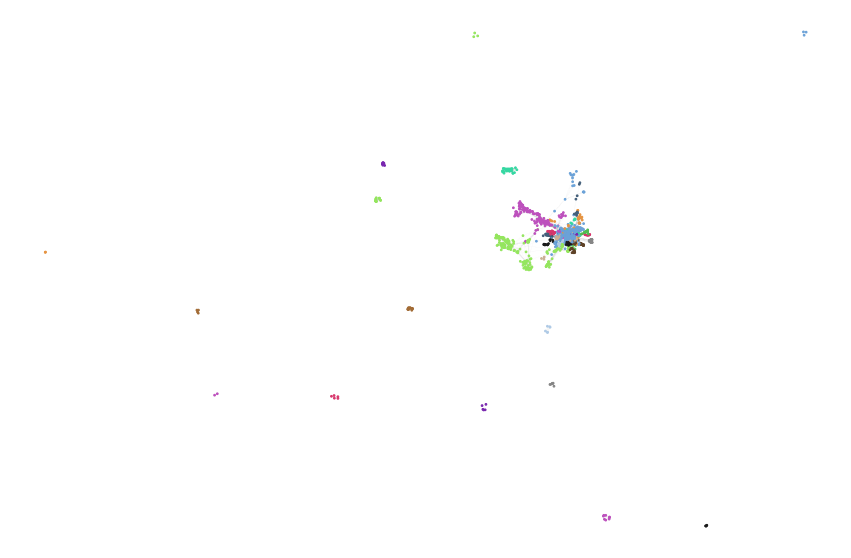

In [8]:
G.plot_communities(max_connected_components = 'all',
                   filename = 'communities_all_components')

Graph saved as ../TeX/Second set/img/communities_biggest_component.png


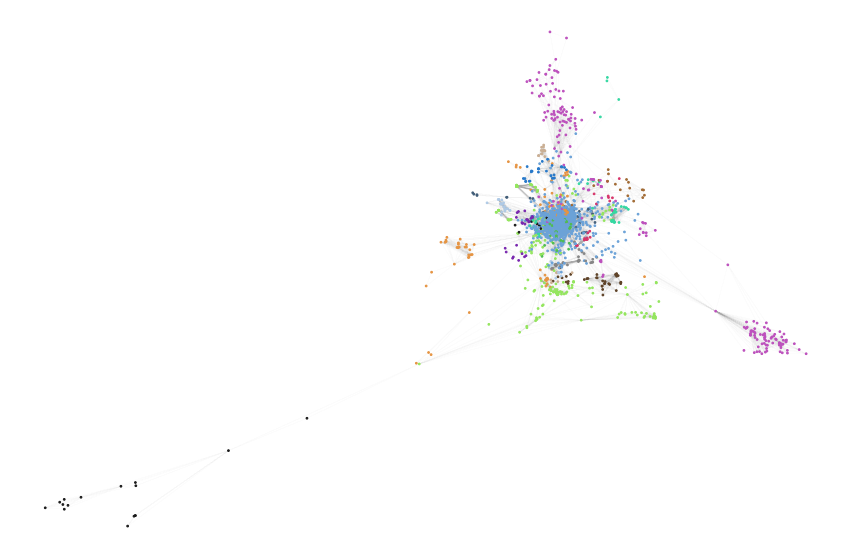

In [9]:
G.plot_communities(filename = 'communities_biggest_component')

In [10]:
H['Cascão']['Cebolinha']

{'weight': 629.5, 'community': 1}

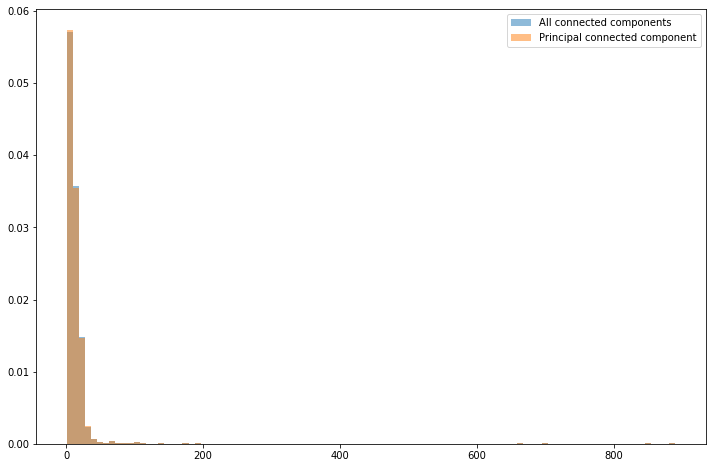

<Figure size 432x288 with 0 Axes>

In [11]:
# degree distribuition
plt.figure(figsize = (12, 8))
plt.hist(G_degrees,
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'All connected components')

plt.hist(H_degrees,
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Principal connected component')

plt.legend(loc = 'upper right')
plt.show()
plt.savefig('../TeX/Second set/img/degree_distribuition.png')

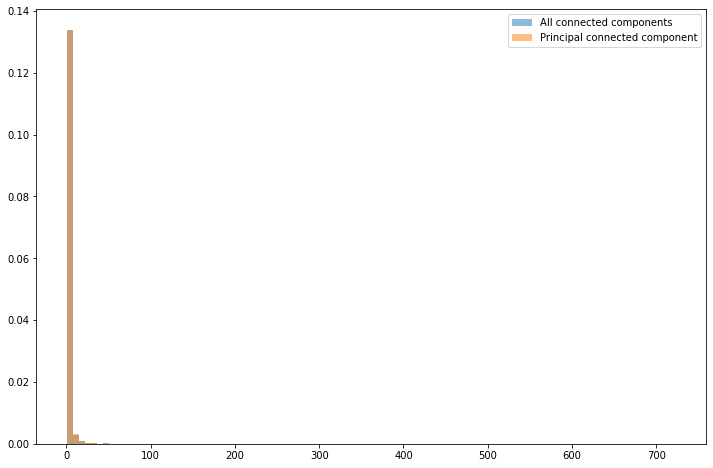

<Figure size 432x288 with 0 Axes>

In [12]:
# weight distribuition
plt.figure(figsize = (12, 8))
plt.hist([float(G.Graph[u][v]['weight']) for u, v in G.Graph.edges()],
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'All connected components')

plt.hist([float(H[u][v]['weight']) for u, v in H.edges()],
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Principal connected component')

plt.legend(loc = 'upper right')
plt.show()
plt.savefig('../TeX/Second set/img/weight_distribuition.png')

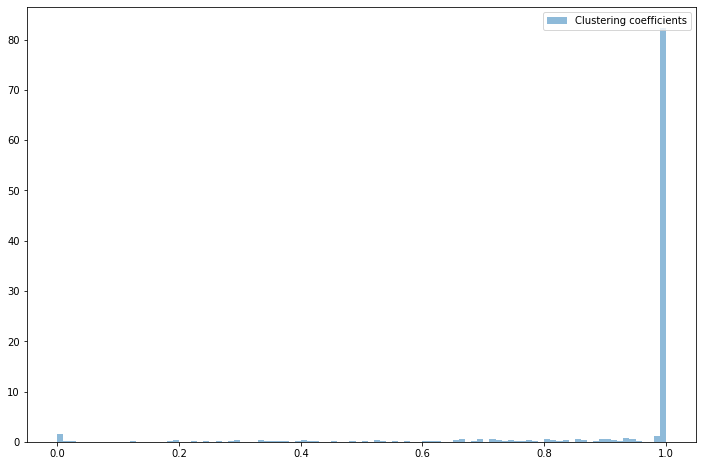

<Figure size 432x288 with 0 Axes>

In [13]:
graph_clustering = clustering(H)
avg_clustering = average_clustering(H)
global_clustering = transitivity(H)
avg_clustering, global_clustering

# clustering coefficients distribuition
plt.figure(figsize = (12, 8))
plt.hist(list(graph_clustering.values()),
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Clustering coefficients')

plt.legend(loc = 'upper right')
plt.show()
plt.savefig('../TeX/Second set/img/clustering_coefficients_distribuition.png')

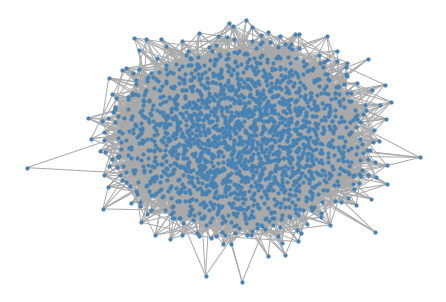

In [14]:
p_ER_Graph = H_density
ER_n_nodes = HN
ER_Graph = nx.Graph()
for u in range(ER_n_nodes):
    for v in range(u + 1, ER_n_nodes):
        if np.random.random() < p_ER_Graph:
            ER_Graph.add_edge(u, v)
            
nx.draw(ER_Graph,
        node_size = 10,
        edge_color = 'darkgray',
        node_color = 'steelblue')

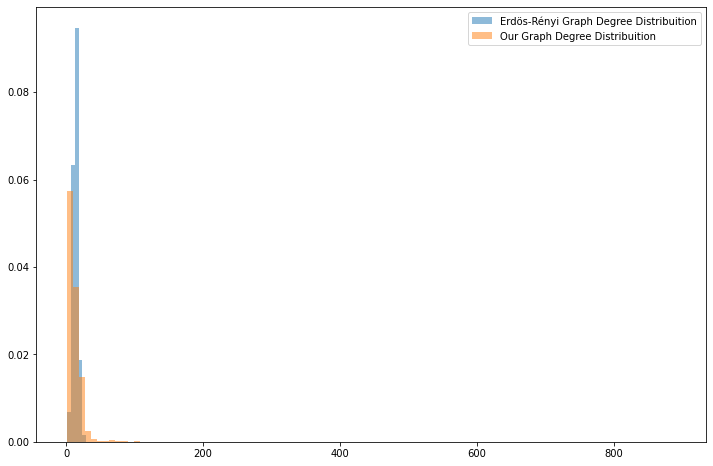

<Figure size 432x288 with 0 Axes>

In [15]:
# comparing degree distribuitions
plt.figure(figsize = (12, 8))
plt.hist(list(np.array(ER_Graph.degree)[:,1].astype(int)),
         bins = 5,
         density = True,
         alpha = 0.5,
         label = 'Erdös-Rényi Graph Degree Distribuition')

plt.hist(H_degrees,
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Our Graph Degree Distribuition')

plt.legend(loc = 'upper right')
plt.show()
plt.savefig('../TeX/Second set/img/degree_comparition.png')

In [16]:
D = np.array(H.degree(weight = 'weight'))
D = list(sorted(D, key = lambda x : float(x[1]), reverse = True))
D = [list(d) for d in D]
i = 0

while i < len(D):
    if D[i][0] in ['Mônica', 'Cebolinha', 'Magali', 'Cascão', 'Chico Bento']:
        D.remove(D[i])
    else:
        i += 1
        
D

[['Franjinha', '838.5'],
 ['Sansão', '737.5'],
 ['Denise', '712.0'],
 ['Astronauta', '524.0'],
 ['Xabéu', '511.0'],
 ['Robô', '386.0'],
 ['Capitão Feio', '380.0'],
 ['Xaveco', '361.0'],
 ['Carminha Frufru', '360.0'],
 ['Dona Luísa', '330.5'],
 ['Marina', '299.5'],
 ['Princesa Usagi Mimi', '292.5'],
 ['Coelho Caolho', '269.0'],
 ['Maria Cascuda', '265.0'],
 ['Bidu', '260.0'],
 ['Penadinho', '259.0'],
 ['Tonhão da Rua de Baixo', '245.5'],
 ['Seu Cebola', '243.5'],
 ['Anjinho', '237.0'],
 ['Piteco', '226.0'],
 ['#1tmj_06 Robô Tzk 1', '212.0'],
 ['#1tmj_06 Robô Tzk 2', '208.0'],
 ['#1tmj_06 Robô Tzk 3', '208.0'],
 ['Yuka', '203.5'],
 ['#1tmj_06 Robô Tzk 4', '197.0'],
 ['#1tmj_06 Robô Tzk 5', '197.0'],
 ['Zé Vampir', '195.5'],
 ['#1tmj_04 Figurante 8', '185.5'],
 ['#1tmj_04 Figurante 9', '185.5'],
 ['#1tmj_04 Figurante 10', '185.5'],
 ['#1tmj_04 Figurante 11', '185.5'],
 ['#1tmj_04 Figurante 12', '185.5'],
 ['Raposão', '183.5'],
 ['Zé Luís', '183.0'],
 ['Titi', '176.0'],
 ['#1tmj_06 Robô Tz

In [17]:
D = np.array(H.degree())
D = list(sorted(D, key = lambda x : float(x[1]), reverse = True))
D = [list(d) for d in D]
i = 0

while i < len(D):
    if D[i][0] in ['Mônica', 'Cebolinha', 'Magali', 'Cascão', 'Chico Bento']:
        D.remove(D[i])
    else:
        i += 1
        
D

[['Sansão', '190'],
 ['Denise', '176'],
 ['Franjinha', '136'],
 ['Carminha Frufru', '111'],
 ['Dona Luísa', '104'],
 ['Bidu', '102'],
 ['Xaveco', '100'],
 ['Piteco', '94'],
 ['Marina', '87'],
 ['Dudu', '85'],
 ['Seu Cebola', '77'],
 ['Duende', '73'],
 ['Capitão Feio', '71'],
 ['Anjinho', '70'],
 ['Astronauta', '70'],
 ['Robô', '69'],
 ['Tonhão da Rua de Baixo', '68'],
 ['Penadinho', '64'],
 ['Princesa Usagi Mimi', '64'],
 ['Maria Cascuda', '63'],
 ['Maurício de Souza', '62'],
 ['Nimbus', '55'],
 ['Dona Cebola', '54'],
 ['Titi', '50'],
 ['Cleópatra Esfíngia', '49'],
 ['Frank', '47'],
 ['Xabéu', '45'],
 ['Zé Vampir', '45'],
 ['Mingau', '44'],
 ['Zé Lelé', '43'],
 ['Planeta Terra', '41'],
 ['Coelho Caolho', '40'],
 ['Lobi', '40'],
 ['Zé Luís', '39'],
 ['Bugu', '38'],
 ['Yuka', '37'],
 ['#tdm07 Sombra 21', '37'],
 ['Muminho', '36'],
 ['Jeremias', '36'],
 ['Espírito do Milharal', '36'],
 ['Bloguinho', '35'],
 ['Luca', '35'],
 ['Dona Lili', '34'],
 ['Giselda', '34'],
 ['Prof Jorge', '33'],
 

In [18]:
nodes = list(H.nodes())
paths = dict(shortest_path(H))
character_to_fig = []
fig_to_fig = []
printed = False
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        u = nodes[i]
        v = nodes[j]
        if len(paths[u][v]) == (H_diameter + 1):
            if u[0] != '#' and v[0] != '#':
                arrow = ' -> '
                print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')
                print()
                printed = True
            elif u[0] != '#' or v[0] != '#':
                character_to_fig.append([u, v])
            else:
                fig_to_fig.append([u, v])
                
if not printed:
    if len(character_to_fig) > 0:
        u, v = character_to_fig[0]
        print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')
    else:
        u, v = fig_to_fig[0]
        print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')

Path from Pipa to #tdm16 Indiazinha 1:
Pipa -> Tina -> Maurício de Souza -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm16 Indiazinha 1


In [19]:
best_friends = {}
for character in H.nodes():
    best_friend = None
    best_friend_relantions = 0
    for connection in H[character]:
        if H[character][connection]['weight'] > best_friend_relantions:
            best_friend = connection
            best_friend_relantions = H[character][connection]['weight']
    
    best_friends[character] = best_friend

best_friends

{'Mônica': 'Cebolinha',
 'Cebolinha': 'Mônica',
 'Magali': 'Mônica',
 'Cascão': 'Cebolinha',
 'Yuka': 'Capitão Feio',
 'Kraker': 'Mônica',
 'Dona Luísa': 'Mônica',
 'Sansão': 'Mônica',
 'Seu Souza': 'Mônica',
 'Dona Lurdinha': 'Cascão',
 'Seu Antenor': 'Dona Luísa',
 'Seu Cebola': 'Cebolinha',
 'Maria Cebolinha': 'Floquinho',
 'Dona Cebola': 'Cebolinha',
 'Seu Carlito': 'Magali',
 'Mingau': 'Magali',
 'Aveia': 'Magali',
 'Dona Lili': 'Dona Luísa',
 'Marina': 'Mônica',
 'Franjinha': 'Cebolinha',
 'Prof Falconi': 'Franjinha',
 '#1tmj_01 Robô Bem-Vindos': 'Franjinha',
 '#1tmj_01 Entregador': 'Franjinha',
 'Anjinho': 'Mônica',
 'Louco': 'Cebolinha',
 'Capitão Feio': 'Cebolinha',
 'Dragão de Poeira': 'Anjinho',
 '#1tmj_01 Monstro de Poeira 1': 'Capitão Feio',
 '#1tmj_01 Monstro de Poeira 2': '#1tmj_01 Monstro de Poeira 1',
 'Monstro de Poeira 1': 'Franjinha',
 '#1tmj_01 Figurante 1': 'Dona Luísa',
 '#1tmj_01 Cavalo 1': 'Dona Luísa',
 '#1tmj_01 Cavalo 2': 'Dona Luísa',
 '#1tmj_01 Cavalo 3': 